In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import expon, weibull_min, gumbel_r, lognorm, genextreme, genpareto


In [ ]:
file_path = '/content/drive/MyDrive/Ramanathapuram_TN.xlsx'
data = pd.read_excel(file_path)
# Step 2: Drop missing values
data.dropna(inplace=True)

In [ ]:
# Extracting extreme series above the 99th quantile for the column 'precipitation'
extreme_series = data[data['precipitation'] > data['precipitation'].quantile(0.99)]
print(extreme_series)

       YEAR  MO  DY  precipitation
147    1982   5  28          34.56
306    1982  11   3          66.23
531    1983   6  16          51.10
614    1983   9   7          33.86
618    1983   9  11          31.98
...     ...  ..  ..            ...
14573  2021  11  25          79.03
14915  2022  11   2          32.37
14952  2022  12   9          65.29
14953  2022  12  10          32.01
14964  2022  12  21          69.81

[150 rows x 4 columns]


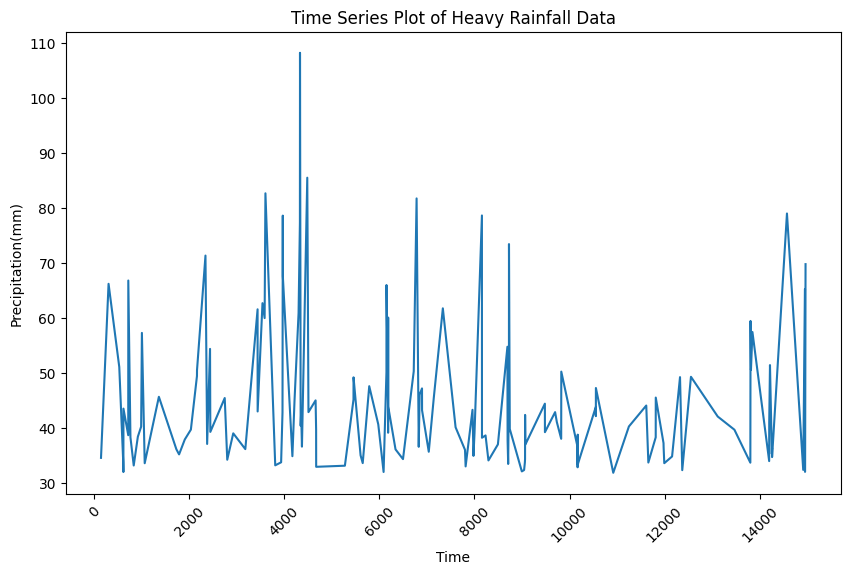

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=extreme_series, x=extreme_series.index, y='precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation(mm)')
plt.title('Time Series Plot of Heavy Rainfall Data')
plt.xticks(rotation=45)
plt.show()


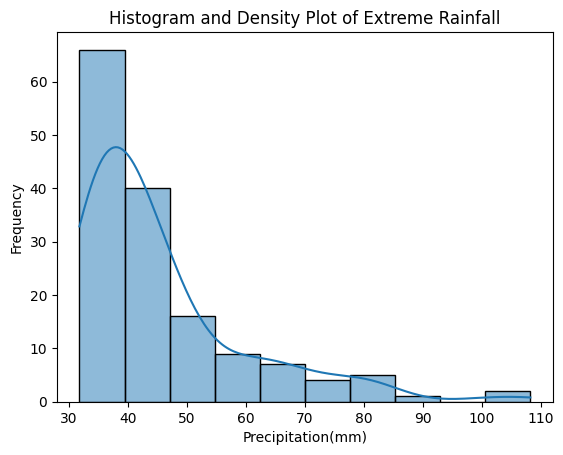

Mean Precipitation: 45.461933333333334 mm
Variance: 205.27145865324383 mm
Standard Deviation: 14.327297674482924
Skewness: 1.835790243090492
Kurtosis: 3.605123658751743
Minimum Precipitation in Extreme series: 31.84 mm
Maximum Precipitation in Extreme Series: 108.27 mm


In [ ]:
# Histogram and density plot
sns.histplot(extreme_series['precipitation'], bins=10, kde=True)
plt.xlabel('Precipitation(mm)')
plt.ylabel('Frequency')
plt.title('Histogram and Density Plot of Extreme Rainfall')
plt.show()

# Calculate statistics
mean = extreme_series['precipitation'].mean()
variance = extreme_series['precipitation'].var()
std_dev = extreme_series['precipitation'].std()
skewness = extreme_series['precipitation'].skew()
kurtosis = extreme_series['precipitation'].kurtosis()
minimum = extreme_series['precipitation'].min()
maximum = extreme_series['precipitation'].max()

print('Mean Precipitation:', mean ,'mm')
print('Variance:', variance, 'mm')
print('Standard Deviation:', std_dev)
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)
print('Minimum Precipitation in Extreme series:', minimum,'mm')
print('Maximum Precipitation in Extreme Series:', maximum,'mm')


In [ ]:
from scipy.stats import kstest

Exponential Model Parameters: (31.84, 13.621933333333335)


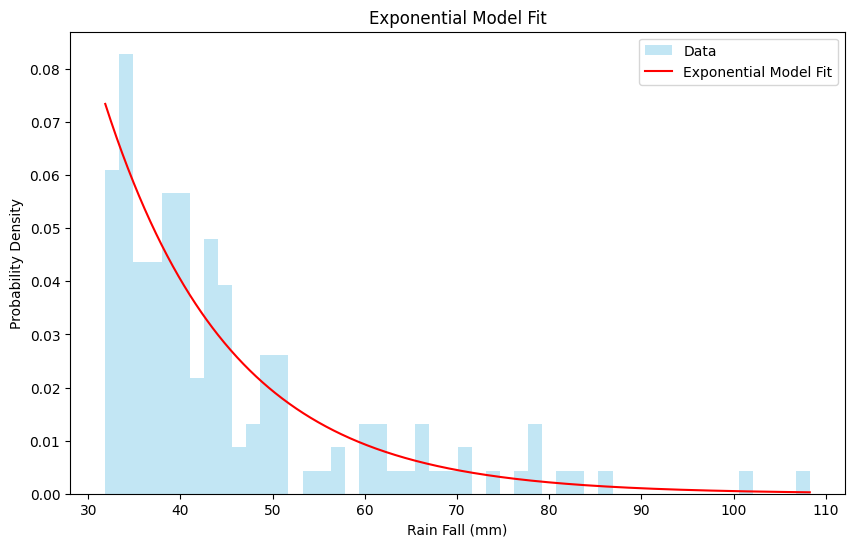

AIC: 1087.50
BIC: 1093.53
KS statistic: 0.06
KS p-value: 0.5833


In [ ]:
params_exp = expon.fit(extreme_series['precipitation'])
print('Exponential Model Parameters:',params_exp )
pdf_exp = expon.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_exp)

# Calculate AIC and BIC
exp_aic = -2 * expon.logpdf(extreme_series['precipitation'], *params_exp).sum() + 2 * len(params_exp)
n = len(extreme_series['precipitation'])
exp_bic = -2 * expon.logpdf(extreme_series['precipitation'], *params_exp).sum() + len(params_exp) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'expon', args=params_exp)
# Plotting the exponential model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_exp, color='red', label='Exponential Model Fit')
plt.title('Exponential Model Fit')
plt.xlabel('Rain Fall (mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()



# Printing AIC, KS statistic, and p-value
print(f"AIC: {exp_aic:.2f}")
print(f"BIC: {exp_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")



Lognormal Model Parameters: (1.0098922212967318, 31.015123995843695, 9.117535227350029)


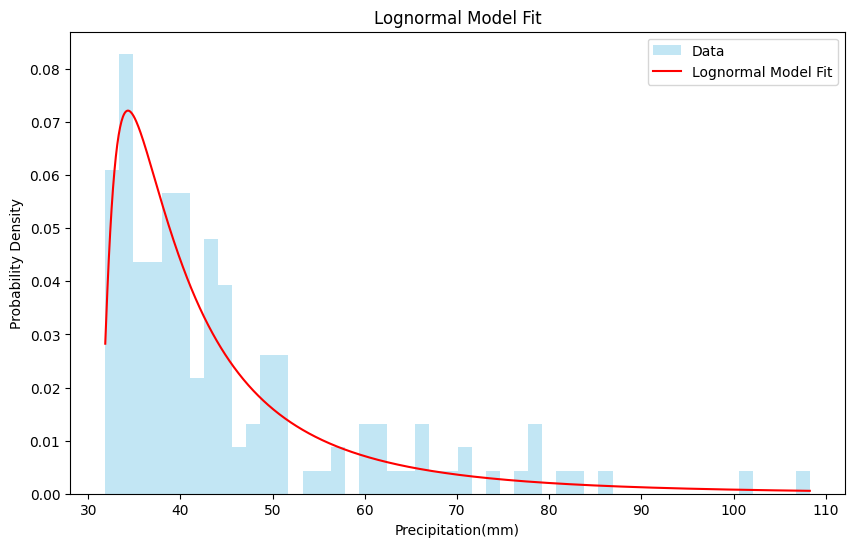

AIC: 1097.69
BIC: 1106.73
KS statistic: 0.05
KS p-value: 0.8660


In [ ]:


# Fitting the data to a lognormal distribution
params_lognorm = lognorm.fit(extreme_series['precipitation'])
print('Lognormal Model Parameters:', params_lognorm)
pdf_lognorm = lognorm.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_lognorm)

# Calculate AIC and BIC
lognorm_aic = -2 * lognorm.logpdf(extreme_series['precipitation'], *params_lognorm).sum() + 2 * len(params_lognorm)
n = len(extreme_series['precipitation'])
lognorm_bic = -2 * lognorm.logpdf(extreme_series['precipitation'], *params_lognorm).sum() + len(params_lognorm) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'lognorm', args=params_lognorm)

# Plotting the lognormal model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_lognorm, color='red', label='Lognormal Model Fit')
plt.title('Lognormal Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {lognorm_aic:.2f}")
print(f"BIC: {lognorm_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")


Gumbel Model Parameters: (39.71747429766864, 8.522735019738905)


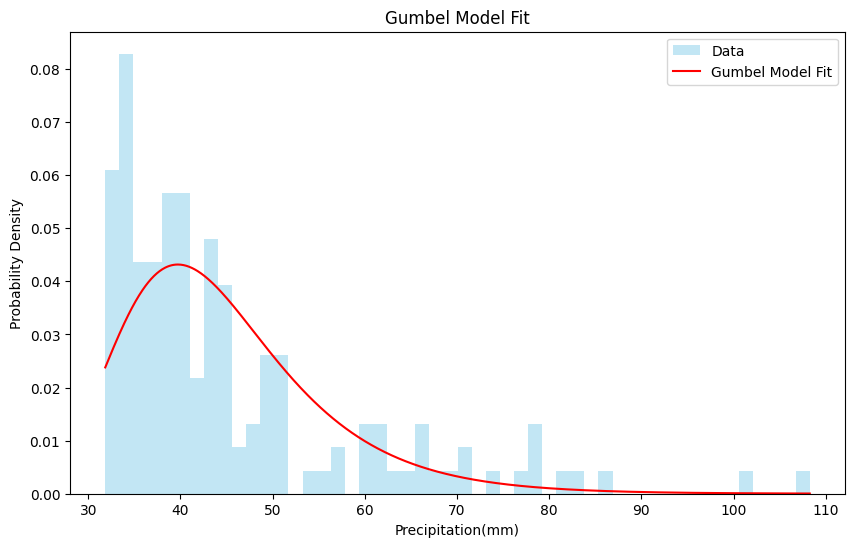

AIC: 1149.03
BIC: 1155.05
KS statistic: 0.11
KS p-value: 0.0512


In [ ]:


# Fitting the data to a gumbel distribution
params_gumbel = gumbel_r.fit(extreme_series['precipitation'])
print('Gumbel Model Parameters:', params_gumbel)
pdf_gumbel = gumbel_r.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_gumbel)

# Calculate AIC and BIC
gumbel_aic = -2 * gumbel_r.logpdf(extreme_series['precipitation'], *params_gumbel).sum() + 2 * len(params_gumbel)
n = len(extreme_series['precipitation'])
gumbel_bic = -2 * gumbel_r.logpdf(extreme_series['precipitation'], *params_gumbel).sum() + len(params_gumbel) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'gumbel_r', args=params_gumbel)

# Plotting the gumbel model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_gumbel, color='red', label='Gumbel Model Fit')
plt.title('Gumbel Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {gumbel_aic:.2f}")
print(f"BIC: {gumbel_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")



Generalised Pareto Model Parameters: (0.5149196621619687, 31.838869893994755, 9.842607165223434)


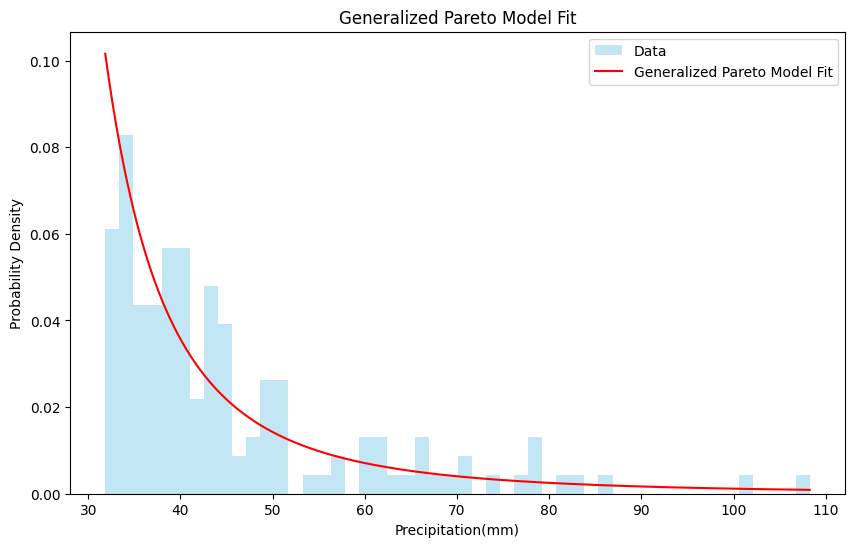

AIC: 1102.16
BIC: 1111.19
KS statistic: 0.07
KS p-value: 0.4627


In [ ]:


# Fitting the data to a generalized pareto distribution
params_genpareto = genpareto.fit(extreme_series['precipitation'])
print('Generalised Pareto Model Parameters:',params_genpareto)
pdf_genpareto = genpareto.pdf(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), *params_genpareto)

# Calculate AIC and BIC
genpareto_aic = -2 * genpareto.logpdf(extreme_series['precipitation'], *params_genpareto).sum() + 2 * len(params_genpareto)
n = len(extreme_series['precipitation'])
genpareto_bic = -2 * genpareto.logpdf(extreme_series['precipitation'], *params_genpareto).sum() + len(params_genpareto) * np.log(n)

ks_statistic, ks_p_value = kstest(extreme_series['precipitation'], 'genpareto', args=params_genpareto)

# Plotting the generalized pareto model fit graph
plt.figure(figsize=(10, 6))

plt.hist(extreme_series['precipitation'], bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(extreme_series['precipitation'].min(), extreme_series['precipitation'].max(), 1000), pdf_genpareto, color='red', label='Generalized Pareto Model Fit')
plt.title('Generalized Pareto Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {genpareto_aic:.2f}")
print(f"BIC: {genpareto_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")


In [ ]:
# finding the annual maxima value for each year

annual_maxima = {}
for year in extreme_series['YEAR'].unique():
  annual_maxima[year] = extreme_series[extreme_series['YEAR'] == year]['precipitation'].max()
  print(annual_maxima[year])


66.23
66.83
57.3
45.67
36.12
50.51
71.37
45.45
40.07
82.7
78.64
108.27
85.54
49.21
47.6
66.01
36.1
81.77
45.52
61.77
43.3
78.67
73.46
42.37
44.42
50.25
38.78
47.27
31.84
40.27
44.08
45.53
49.25
49.31
42.08
39.68
59.47
51.44
79.03
69.81


GEV Model Parameters: (-0.18182459108235305, 47.21862440928598, 11.452842484349999)


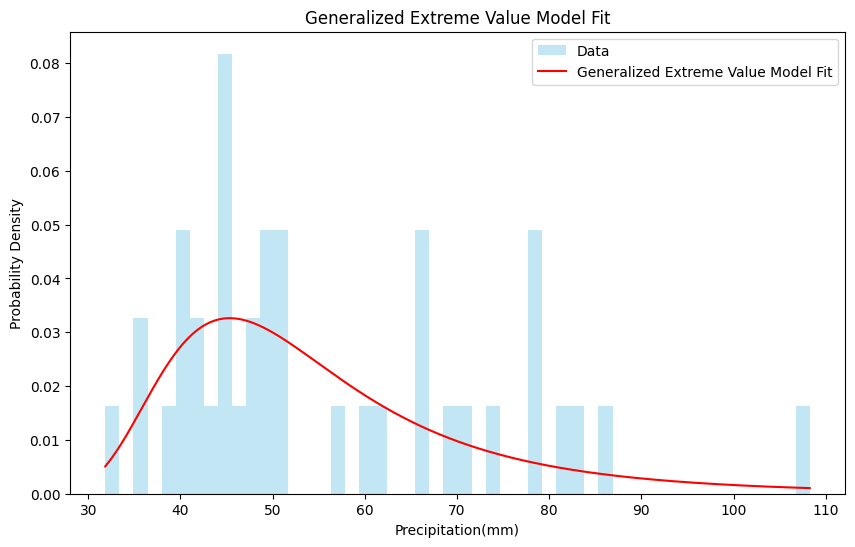

AIC: 335.91
BIC: 340.98
KS statistic: 0.11
KS p-value: 0.6424


In [ ]:
#  using these annual maxima value fitting the Generalised Extreme Value Distribution

params_gev = genextreme.fit(list(annual_maxima.values()))
print('GEV Model Parameters:',params_gev)
pdf_gev = genextreme.pdf(np.linspace(min(annual_maxima.values()), max(annual_maxima.values()), 1000), *params_gev)

# Calculate AIC and BIC
gev_aic = -2 * genextreme.logpdf(list(annual_maxima.values()), *params_gev).sum() + 2 * len(params_gev)
n = len(annual_maxima.values())
gev_bic = -2 * genextreme.logpdf(list(annual_maxima.values()), *params_gev).sum() + len(params_gev) * np.log(n)

ks_statistic, ks_p_value = kstest(list(annual_maxima.values()), 'genextreme', args=params_gev)

# Plotting the generalized extreme value model fit graph
plt.figure(figsize=(10, 6))

plt.hist(list(annual_maxima.values()), bins=50, density=True, alpha=0.5, color='skyblue', label='Data')
plt.plot(np.linspace(min(annual_maxima.values()), max(annual_maxima.values()), 1000), pdf_gev, color='red', label='Generalized Extreme Value Model Fit')
plt.title('Generalized Extreme Value Model Fit')
plt.xlabel('Precipitation(mm)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Printing AIC, KS statistic, and p-value
print(f"AIC: {gev_aic:.2f}")
print(f"BIC: {gev_bic:.2f}")
print(f"KS statistic: {ks_statistic:.2f}")
print(f"KS p-value: {ks_p_value:.4f}")

In [ ]:

# Extract the parameters from the fitted lognormal model
print(params_lognorm)
mu, sigma, shape = params_lognorm

# Calculate the return period for 60 mm precipitation
return_period = 1 / (1 - lognorm.cdf(60, mu, sigma, shape))

# Print the return period
print(f"Return period for 60 mm precipitation using Lognormal: {return_period:.2f} years")


(1.0098922212967318, 31.015123995843695, 9.117535227350029)
Return period for 60 mm precipitation using Lognormal: 7.93 years


In [ ]:
# Extract the parameters from the fitted lognormal model
print(params_lognorm)
mu, sigma, shape = params_lognorm

# Calculate the return period for 80 mm precipitation
return_period = 1 / (1 - lognorm.cdf(80, mu, sigma, shape))

# Print the return period
print(f"Return period for 80 mm precipitation using Lognormal: {return_period:.2f} years")


(1.0098922212967318, 31.015123995843695, 9.117535227350029)
Return period for 80 mm precipitation using Lognormal: 20.85 years


In [ ]:
# Extract the parameters from the fitted lognormal model
print(params_lognorm)
mu, sigma, shape = params_lognorm

# Calculate the return period for 100 mm precipitation
return_period = 1 / (1 - lognorm.cdf(100, mu, sigma, shape))

# Print the return period
print(f"Return period for 100 mm precipitation using Lognormal: {return_period:.2f} years")


(1.0098922212967318, 31.015123995843695, 9.117535227350029)
Return period for 100 mm precipitation using Lognormal: 44.36 years


In [ ]:
# Extract the parameters from the fitted lognormal model
print(params_lognorm)
mu, sigma, shape = params_lognorm

# Calculate the return period for 150 mm precipitation
return_period = 1 / (1 - lognorm.cdf(150, mu, sigma, shape))

# Print the return period
print(f"Return period for 150 mm precipitation using Lognormal: {return_period:.2f} years")


(1.0098922212967318, 31.015123995843695, 9.117535227350029)
Return period for 150 mm precipitation using Lognormal: 182.31 years
